### Plotting with matplotlib 

Matplotlib is a python library that allows you to build plots from first principles, adding elements sequentially.  This differs from the syntax of seaborn and pandas plotting capabilities. It has the advantage of greater customisation, but as a result of the first principles approach it can be more difficult to make complex plots. However, it can be very handy to know how to plot without dataframes in python.


### Syntax

Matplotlib works with 2 main objects: Figures and Axes. The *figure* is the canvas that plots can be drawn onto, and the *axes* are plots. The syntax will often involve declaring a figure with `plt.figure()` or `plt.subplots()`, and then adding whatever plots you want to the figure object through adding to the axes (this may take the form of `plt.plot(data)` when using an the first approach, or `ax_name.plot()` if you have defined the figure and axes using the second approach, `fig_obj,ax_name = plt.subplots()`).

An example is provided below:




In [33]:
## first, import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
np.random.seed=10
%matplotlib inline
# set the style we want to use 
mplstyle.use(['classic','ggplot'])

[]

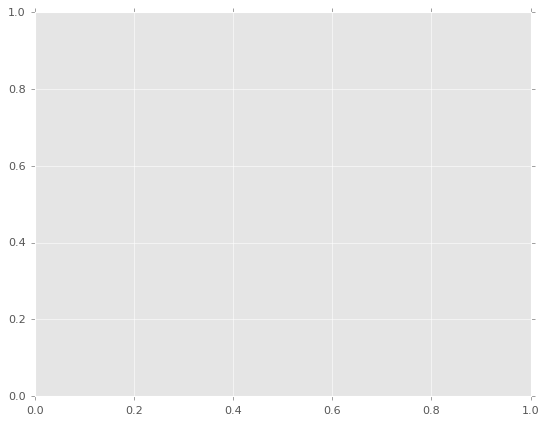

In [34]:
# first approach - plt.figure()

plt.figure()
plt.plot()



[]

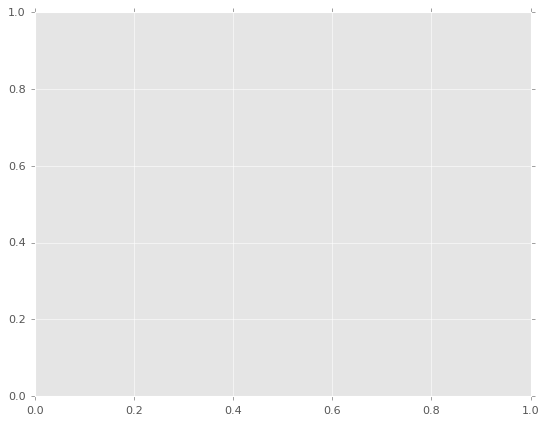

In [35]:
# this is the same as declaring plt.subplots and adding to the axis object 

fig,ax=plt.subplots()
ax.plot()

[]

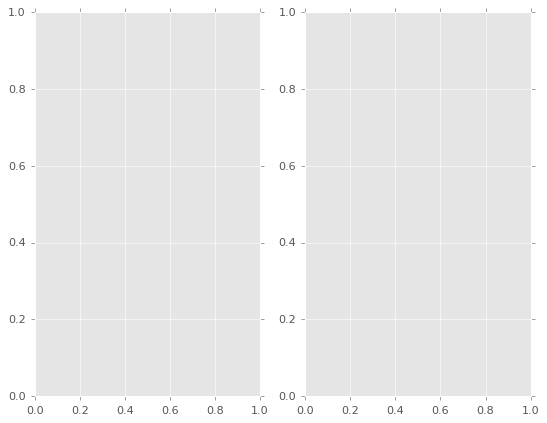

In [36]:
# we can then create more canvas objects using subplots and add to those canvas objects by calling them 
# and adding to them, like ax.plot() etc

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)

ax1.plot()
ax2.plot()

[]

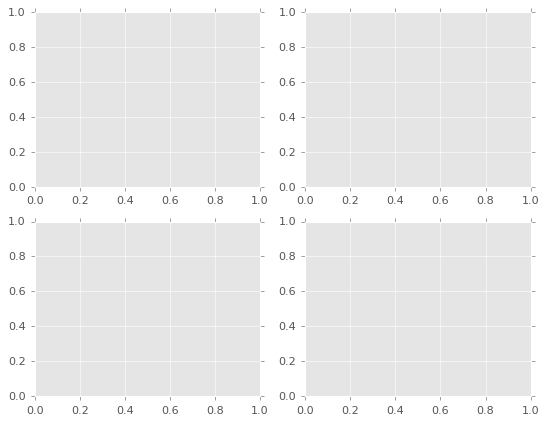

In [37]:
# then a 4x4 for reference - just to illustrate the bracket syntax

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)

ax1.plot()
ax2.plot()
ax3.plot()
ax4.plot()

#### Simulating some data

Let's suppose we have 2 python lists containing information about the relative expression of 40 proteins of interest in 2 conditions. 

We can use *numpy* to simulate this data from a normal distribution, that will differ in the standard deviations and mean. 



### Histograms


Histograms are a great way to visualise the distribution of a certain variable. This can let you know where most of the values are centred around for instance - so with this normally distributed simulation, we can expect that most of the values will be centred aroudn the mean we set, and decrese in frequency according to the standard deviation we set. 

Text(0.5, 1.0, 'Density of protein expression in second condition')

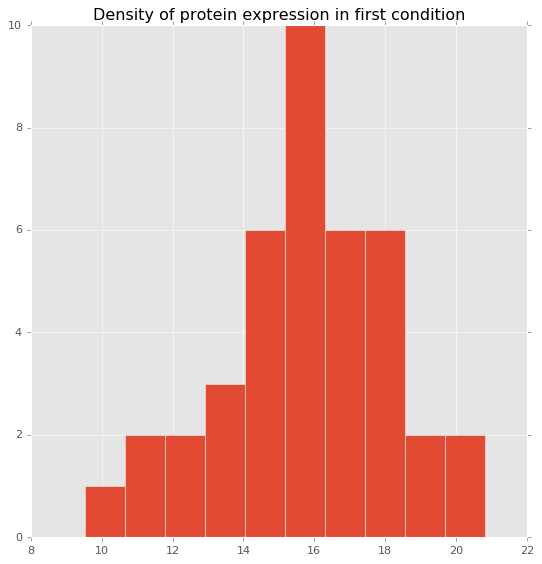

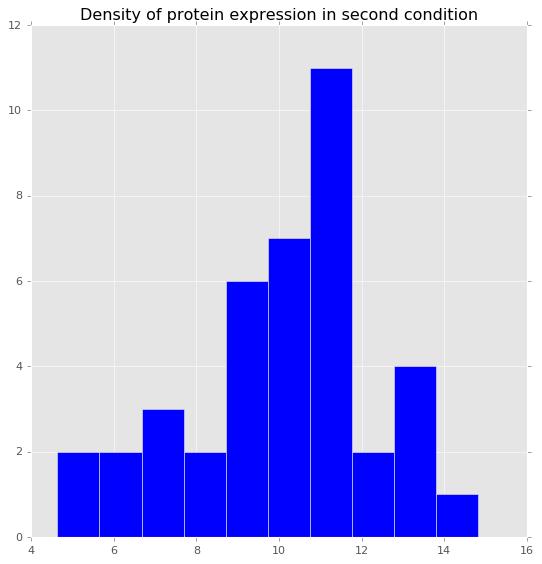

In [38]:
x1 = np.random.normal(15,3,size=[40]) # treat this as expression from
# one condition- A
x2 = np.random.normal(10,2,size=[40])
# expression from a second condition - B 
## plot the distribution of values.




plt.figure(figsize=(8,8))
# declare the figure and set the size

# then add to the axes of the plot - calling plt.figure then calling plt.plot after will assume you are talking
# about the last figure you declared

plt.hist(x1) # plot a histogram of the data  

# set the title 

plt.title('Density of protein expression in first condition')


## do the same for the second condition 

plt.figure(figsize=(8,8))
plt.hist(x2,color='blue')
plt.title('Density of protein expression in second condition')


We can show the same plots side by side with the following syntax, usng the subplots function.

Text(0.5, 0.98, 'Relative protein expression density in 2 conditions')

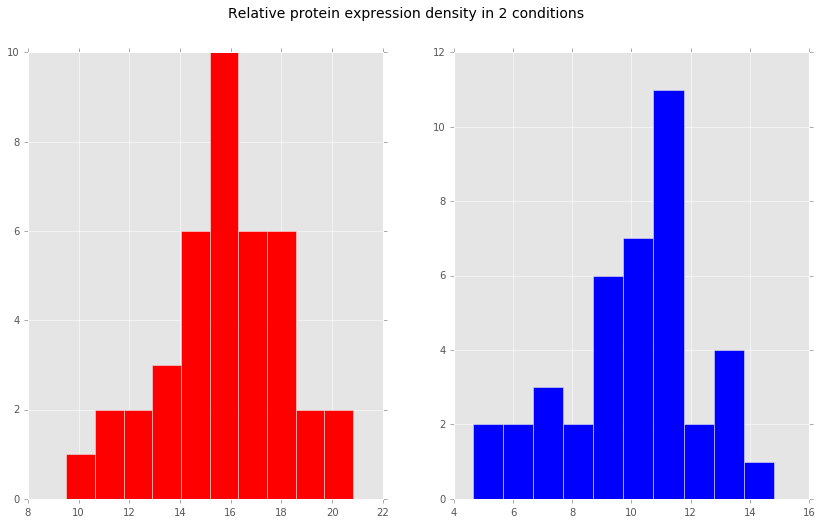

In [39]:
%matplotlib inline

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,8)) # say we want 1 row, 2 columns of plots

ax1.hist(x1,color='red') # add one histogram to one axis
ax2.hist(x2,color='blue')# add another histogram to another 
# set a global title 
fig.suptitle('Relative protein expression density in 2 conditions', fontsize=14)



Try changing the bins parameter to a different value (this essentially tells the histogram how many groups you want the data put into). 


Text(0.5, 0.98, 'Relative protein expression density in 2 conditions')

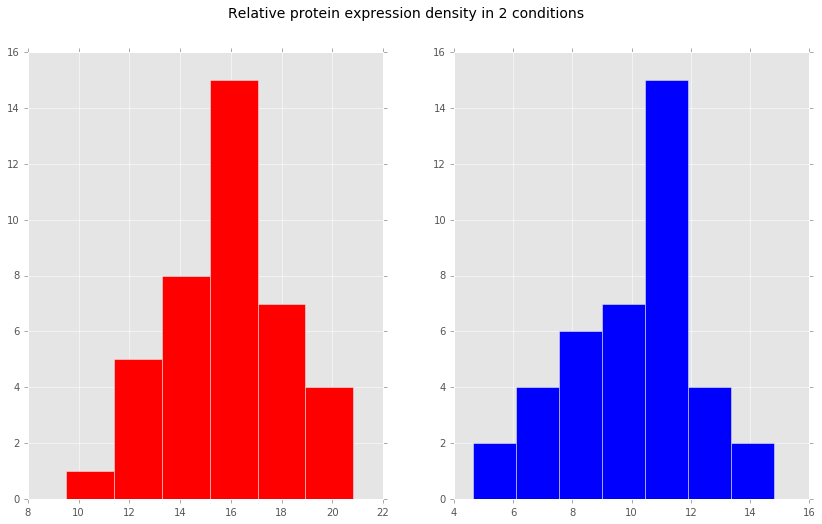

In [40]:
# Chaning bins

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,8)) # say we want 1 row, 2 columns of plots

ax1.hist(x1,color='red',bins=6) # add one histogram to one axis with bins = 6
ax2.hist(x2,color='blue',bins=7)# add another histogram to another 
# set a global title 
fig.suptitle('Relative protein expression density in 2 conditions', fontsize=14)

### Boxplots 

We can then use the same syntax to visualise some boxplots, which contains information about the median, lower and upper quantiles, and outliers. These are great plots if you want to visualise the differences in statistics betweeen 2 groups. 


Below will also be an example of setting custom labels. This can be tricky because depending on the style of plots you want to use, you might not always get the same results in terms of where you need to put the labels or how you reference it. 


Text(0.5, 1.0, 'Violin plot of condition A vs condition B')

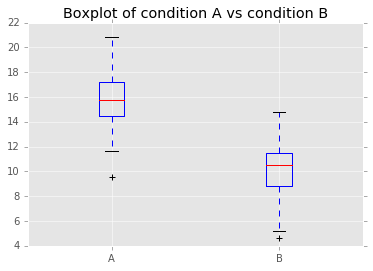

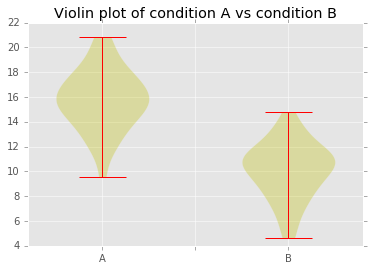

In [48]:
fig,ax=plt.subplots() 
data_to_plot=[x1,x2] # put data into single object - this is really handy for certain plots
ax.boxplot(data_to_plot)
ax.set_xticklabels(['A','B'])
ax.set_title('Boxplot of condition A vs condition B')


## we can also do violin plots which might be easier to look at 

fig,ax=plt.subplots()
data_to_plot=[x1,x2]
ax.violinplot(data_to_plot)
ax.set_xticklabels(['','A','','B']) # this is an example of matplotlib not knowing where you want to put the 
# labels, so you have to just play with it a little
ax.set_title('Violin plot of condition A vs condition B')


A further note about labels - we can also rotate them according to whatever criteria we want (for example if they are squashed together). 

Text(0.5, 1.0, 'Violin plot of condition A vs condition B')

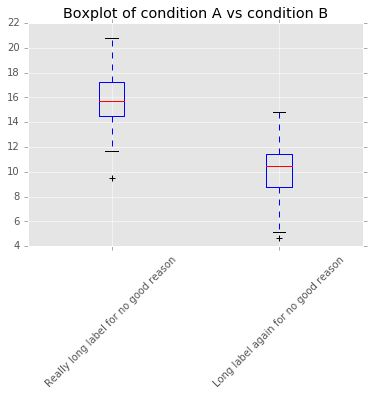

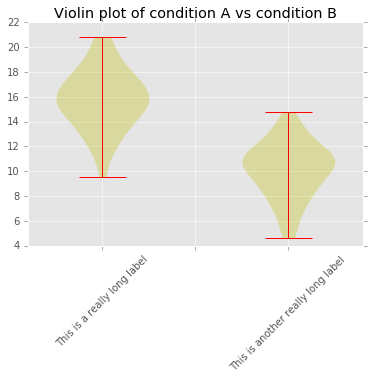

In [49]:
fig,ax=plt.subplots() 
data_to_plot=[x1,x2] # put data into single object - this is really handy for certain plots
ax.boxplot(data_to_plot)
ax.set_xticklabels(['Really long label for no good reason','Long label again for no good reason'],rotation=45)
ax.set_title('Boxplot of condition A vs condition B')


## we can also do violin plots which might be easier to look at 

fig,ax=plt.subplots()
data_to_plot=[x1,x2]
ax.violinplot(data_to_plot)
ax.set_xticklabels(['','This is a really long label','','This is another really long label'],rotation=45) 
ax.set_title('Violin plot of condition A vs condition B')


We can also colour the plots based on groups (albeit this is a little more complex). This is where libraries like seaborn and pandas become more useful. you will also notice `fig.suptitle` being used, which, when workign with fig and ax objects, will create an overall title for the entire plot. Because we are declaring 2 different figures, `ax.set_title` and `fig.suptitle` basically do the same thing. 

Text(0.5, 0.98, 'Colored violin plots')

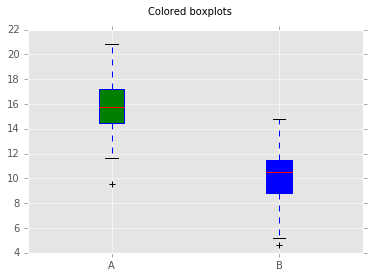

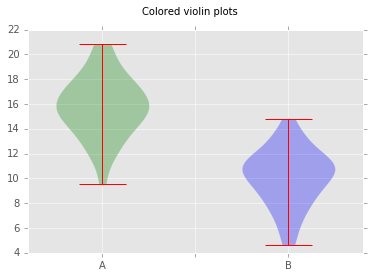

In [50]:

# change colour of groups
fig,ax=plt.subplots() # specifying what we are working on
bplot=ax.boxplot(data_to_plot,patch_artist=True) # first condition
ax.set_xticklabels(['A','B'])
colors = ['green','blue']
for patch, color in zip(bplot['boxes'], colors): # for every boxplot box in this plot, and every color in this list
        patch.set_facecolor(color) # set the box to the corresponding color
fig.suptitle('Colored boxplots')

# and again for violin plots 

fig,ax=plt.subplots() # specifying what we are working on
vplot=ax.violinplot(data_to_plot,positions=[1,2]) # first condition
ax.set_xticklabels(['','A','','B'])
colors = ['green','blue']
for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)
fig.suptitle('Colored violin plots')




Text(0.5, 0.98, 'Expression in condition A and B')

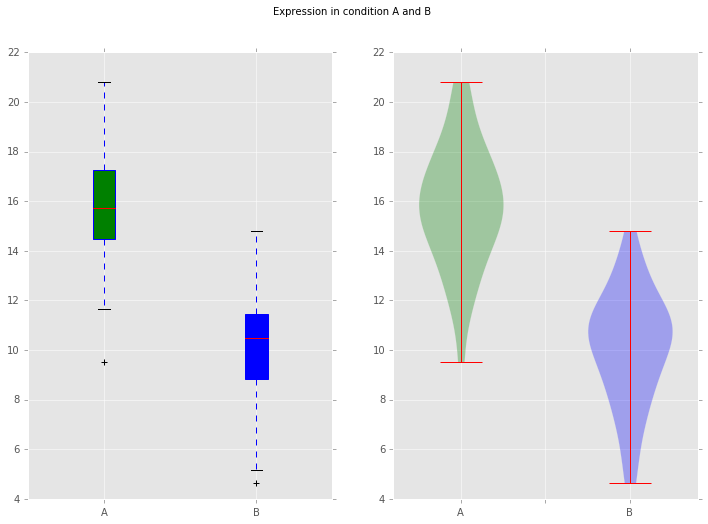

In [51]:
# we can also plot them on the same row

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8)) # specifying what we are working on
bplot=ax1.boxplot(data_to_plot,patch_artist=True)

ax1.set_xticklabels(['A','B'])
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
vplot=ax2.violinplot(data_to_plot)

ax2.set_xticklabels(['','A','','B'])
colors = ['green','blue']
for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)
#total title

fig.suptitle('Expression in condition A and B')


If you want to make any label object go away once you call the plot (the annoying Text, 0.5, 0.98 output above), you need to assign it to a dummy variable, like this: 

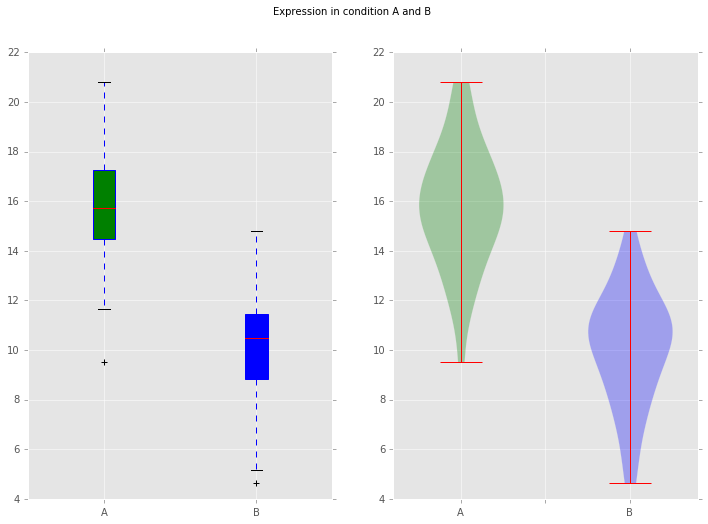

In [52]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8)) # specifying what we are working on
bplot=ax1.boxplot(data_to_plot,patch_artist=True)

ax1.set_xticklabels(['A','B'])
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
vplot=ax2.violinplot(data_to_plot)

ax2.set_xticklabels(['','A','','B'])
colors = ['green','blue']
for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)
#total title

_=fig.suptitle('Expression in condition A and B') # assign this to a variable


### Scatterplots

Say we introduce a third condition, which is a gain of function knockout. This results in heightened protein expression in the new condition compared to the other 2. If we want to visualise the relationship between the 2 variables, we can plot a scatterplot.  

Text(0.5, 1.0, 'B vs C')

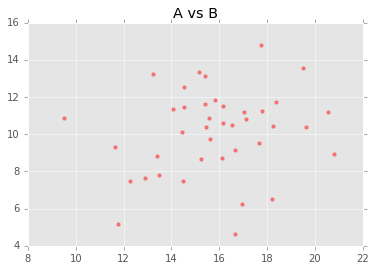

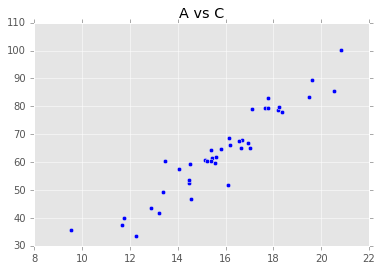

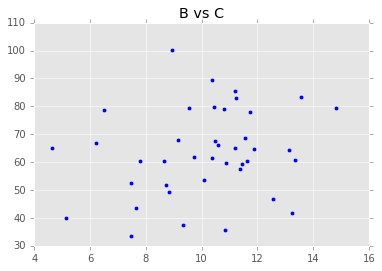

In [53]:
y=x1**1.5 + np.random.normal(0,5,40) # this can be the new condition +- some noise 
# visualise the relationship between condition one and two first

plt.figure()
# plt.scatter
plt.scatter(x=x1,y=x2,alpha=0.5,c='red')
plt.title('A vs B')
# now plot condition A vs C 

plt.figure()
plt.scatter(x=x1,y=y)
plt.title('A vs C')

# then finally B vs C 


plt.figure()
plt.scatter(x=x2,y=y)
plt.title('B vs C')


Text(0.5, 1.0, 'B vs C')

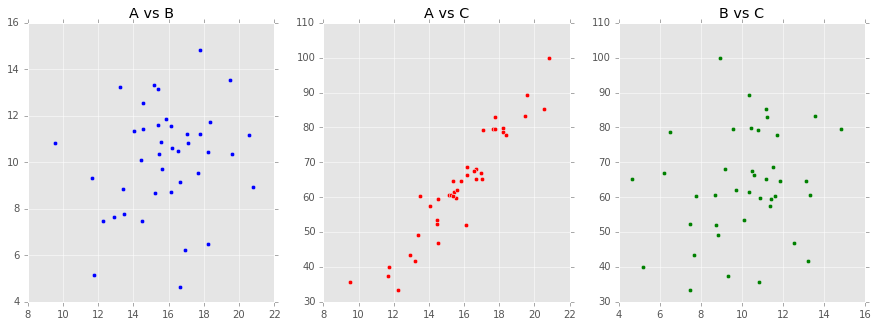

In [54]:
# we can organise the plots above into 3 subplots on the same row 

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.scatter(x1,x2)
ax1.set_title('A vs B')
ax2.scatter(x1,y,c='red')
ax2.set_title('A vs C')
ax3.scatter(x2,y,c='green')
ax3.set_title('B vs C')

### Line of best fit 

If we are interested in the relationship between one variable and another, we might calculate the Pearson correlation between them. It is a scale from -1 to 1 of the concordance of the data, which is whether as one increases the other also increases. This can often be interpreted as a relationship between 2 variables if the Pearson correlation coefficient is high (or low). We can also draw lines of best fit by solving $y=mx+c$. $R^2$,the square of the Pearson correlation coeficient can give us a measure of goodness of fit of this line, or the percentage of variation in Y explained by X.  It is calculated by 
$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$


where $x_i$ is each element of X, $\overline{x}$ is the mean of X, $y_i$ is each element of Y and $\overline{y}$ is the mean of Y. $\sum_{i=1}^{n}$ denotes we want the sum of whatever comes after that symbol (from $i$ to $n$ where $i$ is any element of a vector and $n$ is the total number of elements in the vector). 


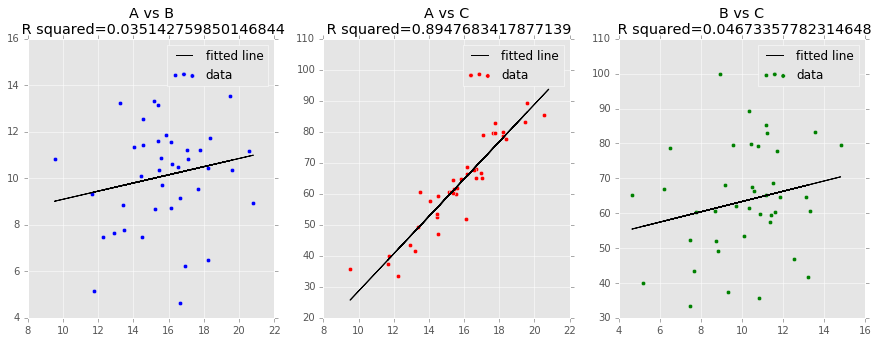

In [55]:
# fit regression line 

A1 = np.vstack([x1, np.ones(len(x1))]).T # matrix form of x1
m1,c1=np.linalg.lstsq(A1,x2,rcond=None)[0] # gets m and c

A2 = np.vstack([x1, np.ones(len(x1))]).T 
m2,c2=np.linalg.lstsq(A2,y,rcond=None)[0]

A3 = np.vstack([x2, np.ones(len(x1))]).T 
m3,c3=np.linalg.lstsq(A3,y,rcond=None)[0]

# create plots 

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))


ax1.scatter(x1,x2,label='data')
ax1.plot(x1,m1*x1+c1,'r',label='fitted line',c='black')
ax1.set_title('A vs B\n R squared={}'.format(np.corrcoef(x=x1,y=x2)[0,1]**2))
ax1.legend()


ax2.scatter(x1,y,c='red',label='data')
ax2.plot(x1,m2*x1+c2,'r',label='fitted line',c='black')
ax2.set_title('A vs C\n R squared={}'.format(np.corrcoef(x=x1,y=y)[0,1]**2))
ax2.legend() 


ax3.scatter(x2,y,c='green',label='data')
ax3.plot(x2,m3*x2+c3,'r',label='fitted line',c='black')
ax3.set_title('B vs C\n R squared={}'.format(np.corrcoef(x=x2,y=y)[0,1]**2))
_=ax3.legend()


This can be a good approach for exploratory analysis of whatever data you are working on. As matplotlib works on first principles, it can be a little more verbose than seaborn or pandas.


### Barplots 

Say we want to visualise the concentration of certain properties in the same position across conditons. We can use the barplot function. These are a good example of a plot that takse some fiddling with in terms of labels and indexes. We can take a subset of the data to examine it and how it behaves with different functions.



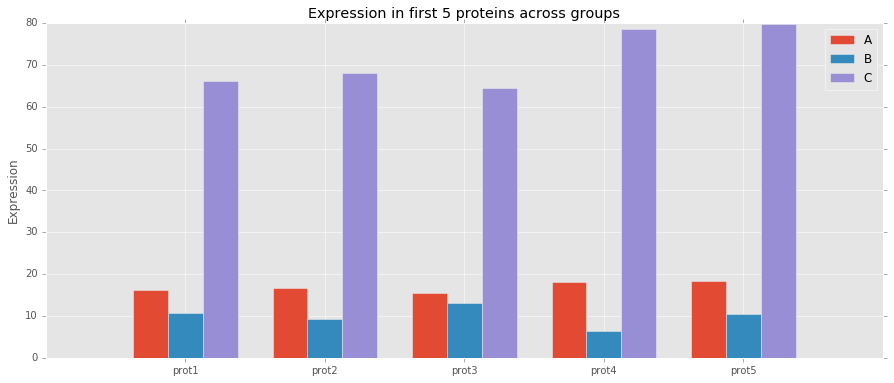

In [57]:
x1_sub=x1[:5]
x2_sub=x2[:5]
y_sub=y[:5]

labels=['prot1','prot2','prot3','prot4','prot5'] # define group labels 
ind=np.arange(len(labels)) # set the x index values 
width=0.25 # width of the bars 
fig, ax = plt.subplots(figsize=(15,6))




# first argument here is position on plot - hence we adjust it by + and minus because matplotlib wants to know 
# exactly where to place it on the plot.

ax.bar(ind-width,x1_sub,width,label='A') # first

ax.bar(ind,x2_sub,width,label='B') # second

ax.bar(ind+width,y_sub,width,label='C') # third

ax.set_ylabel('Expression')
ax.set_title('Expression in first 5 proteins across groups')
ax.set_xticks(ind) # remember this for the worksheet
ax.set_xticklabels(labels) # remember this for the worksheet
_=ax.legend() # jsut get rid of the message

We can also put into practice the same thing we observed earlier and rotate the labels or change the spacing of the indexes

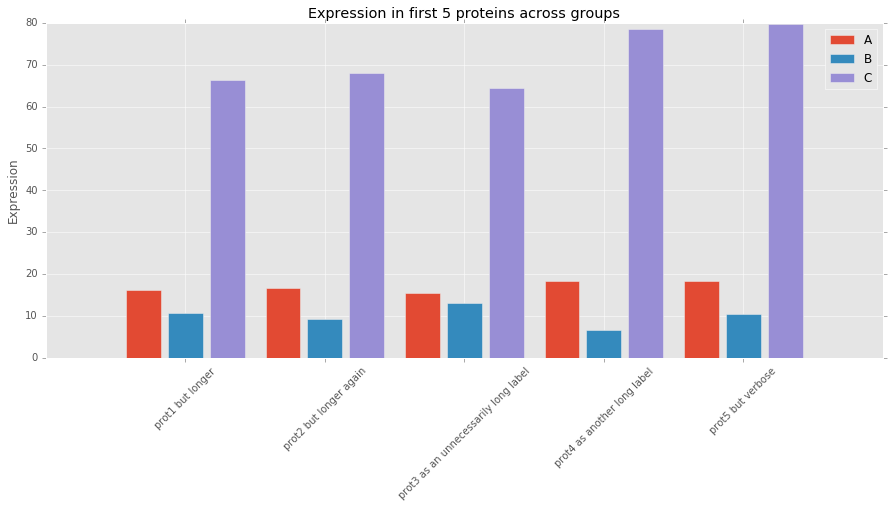

In [64]:
labels=['prot1 but longer','prot2 but longer again','prot3 as an unnecessarily long label',
        'prot4 as another long label','prot5 but verbose'] # define group labels 
ind=np.arange(len(labels)) # set the x index values 
width=0.25 # width of the bars 
fig, ax = plt.subplots(figsize=(15,6))




# first argument here is position on plot - hence we adjust it by + and minus because matplotlib wants to know 
# exactly where to place it on the plot.

ax.bar(ind-(width+0.05),x1_sub,width,label='A') # first

ax.bar(ind,x2_sub,width,label='B') # second

ax.bar(ind+(width+0.05),y_sub,width,label='C') # third

ax.set_ylabel('Expression')
ax.set_title('Expression in first 5 proteins across groups')
ax.set_xticks(ind) # remember this for the worksheet
ax.set_xticklabels(labels,rotation=45) # remember this for the worksheet
_=ax.legend() # just get rid of the message

### Querying real data

You won't always get your data in numpy arrays and lists, but you can get them that way to plot by just using some basic subsetting functions. Say for instance, in a totally hypothetical example, your worksheet contains a pandas dataframe. You could get that hypothetical data into a numpy array by just locating what you want with `subset_df=dataframe_name.loc['row name']` to get a subset of the total data, then take what you want into an array by using `what_i_want_to_plot=subset_df['column of interest']`. Remember this for your worksheet! 

### Interactivity

We can create interactive plots pretty easily by calling a different magic command here (prefaced by the % command). You can customize spyder to do this automatically. 



In [ ]:
%matplotlib tk
fig,ax=plt.subplots()
ax.scatter(x1,y,c='red',label='data')
ax.plot(x1,m2*x1+c2,'r',label='fitted line',c='black')
ax.set_title('A vs C\n R squared={}'.format(np.corrcoef(x=x1,y=y)[0,1]**2))
ax.legend() 



### Image data

For anyone working with image data, matplotlib has some nice slicing and visualisation functions built into the library. 




(480, 320, 3)
<class 'numpy.ndarray'>


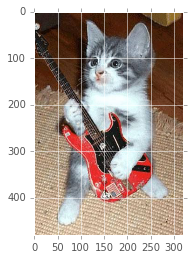

In [65]:
%matplotlib inline
from matplotlib import image
im=image.imread('Pictures/important_image.jpg') # load in the image 

print(im.shape)

print(type(im))


# visualise the image 

plt.imshow(im)



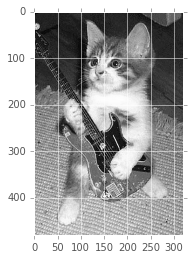

In [66]:
# in black and white - convert color channels to the one channel by scaling them

plt.imshow(np.dot(im[...,:3],[0.33,0.33,0.33]),cmap='gray')

We can just take certain slices / areas as well, and do some rotations. 

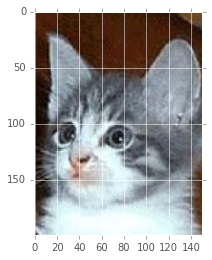

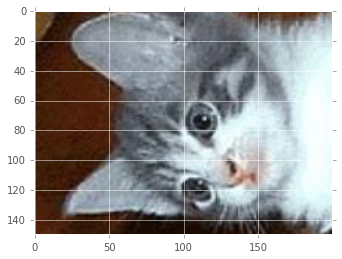

In [67]:
plt.figure()
plt.imshow(im[:200,100:250])

# and again with some rotation
plt.figure()
plt.imshow(np.rot90(im[:200,100:250]))



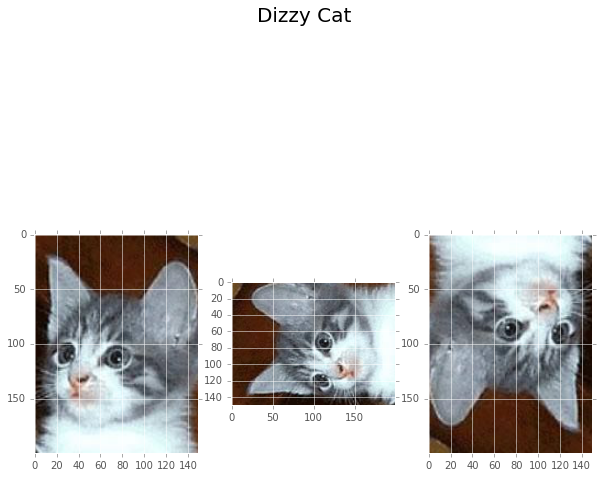

In [69]:
# we can also do the same thing and create subplots 

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,10))
ax1.imshow(im[:200,100:250])

ax2.imshow(np.rot90(im[:200,100:250]))

ax3.imshow(np.rot90(np.rot90(im[:200,100:250])))

_=fig.suptitle('Dizzy Cat',fontsize=20)


You can also iterate over lists in any kind of plot to display multiple objects. We can do this with our picture and specify a range of values we want. 



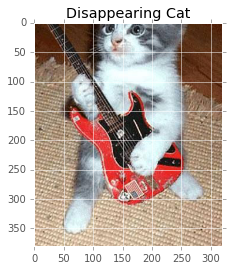

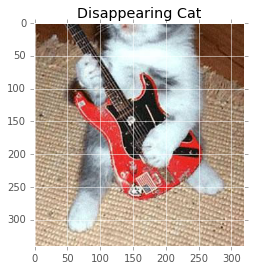

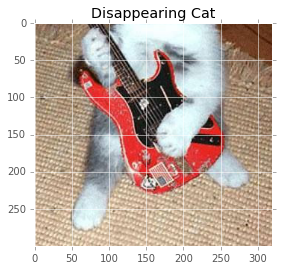

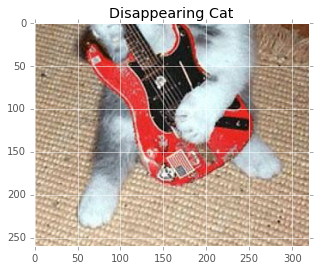

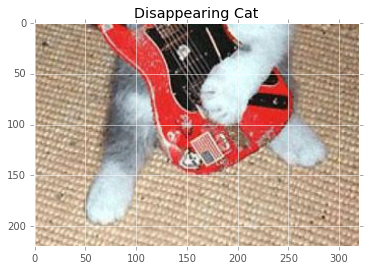

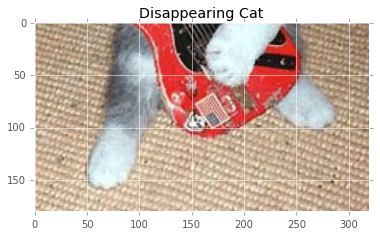

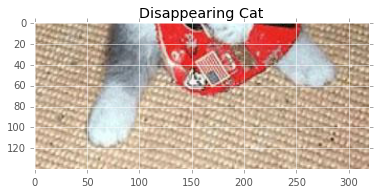

In [70]:
for i in range(100,350,40):
    plt.figure()
    plt.imshow(im[i:])
    plt.title('Disappearing Cat')

Examples of cooler and more advanced plots can be found here: https://matplotlib.org/3.1.1/gallery/

